In [ ]:
import zipfile
with zipfile.ZipFile('/content/maskDetection2.zip', 'r') as zip_ref:
    zip_ref.extractall('/content')

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import keras

In [ ]:
trainData_gen = ImageDataGenerator(rescale=1./255
                                   ,     rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range = 0.2,
    horizontal_flip=True)
valiData_gen = ImageDataGenerator(rescale=1./255)
testData_gen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_ds = trainData_gen.flow_from_directory(
    '/content/Face Mask Dataset/Train',
    target_size=(150 , 150),
    batch_size=32,
    class_mode='binary'
)

vali_ds = valiData_gen.flow_from_directory(
    '/content/Face Mask Dataset/Validation',
    target_size=(150 , 150),
    batch_size=32,
    class_mode='binary'
)

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [ ]:
model = Sequential()
model.add(Conv2D(32 , (3,3) , activation='relu' , input_shape=(150 , 150 , 3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64 , (3,3) , activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128 , (3,3) , activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128 , (3,3) , activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(512 , activation='relu'))
model.add(Dense(1 , activation='sigmoid'))

model.compile(optimizer='rmsprop' , loss='binary_crossentropy' , metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.fit(train_ds , epochs=10 , validation_data=vali_ds)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step - accuracy: 0.7860 - loss: 0.4580

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


313/313 ━━━━━━━━━━━━━━━━━━━━ 73s 225ms/step - accuracy: 0.7862 - loss: 0.4576 - val_accuracy: 0.9663 - val_loss: 0.1165
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 67s 214ms/step - accuracy: 0.9242 - loss: 0.2118 - val_accuracy: 0.9388 - val_loss: 0.1674
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 69s 220ms/step - accuracy: 0.9237 - loss: 0.2042 - val_accuracy: 0.9688 - val_loss: 0.1000
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 70s 223ms/step - accuracy: 0.9349 - loss: 0.1856 - val_accuracy: 0.9463 - val_loss: 0.1731
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 68s 216ms/step - accuracy: 0.9386 - loss: 0.1761 - val_accuracy: 0.9400 - val_loss: 0.1664
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 68s 218ms/step - accuracy: 0.9493 - loss: 0.1568 - val_accuracy: 0.9488 - val_loss: 0.1427
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 69s 220ms/step - accuracy: 0.9457 - loss: 0.1535 - val_accuracy: 0.9837 - val_loss: 0.0757
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 69s 220ms/step - accuracy: 0.9552 - loss: 0.1400 - val

In [ ]:
model.save("maskModel.keras")

In [ ]:
test_ds = testData_gen.flow_from_directory(
    '/content/Face Mask Dataset/Test',
    target_size=(150 , 150),
    batch_size=32,
    class_mode='binary'
)

Found 992 images belonging to 2 classes.


In [ ]:
loss , accuracy = model.evaluate(test_ds)

 1/31 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - accuracy: 1.0000 - loss: 2.4156e-04

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.9796 - loss: 0.0541


In [ ]:
import cv2
img = cv2.imread('/content/images.jpeg')
img = cv2.resize(img , (150 , 150))


array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
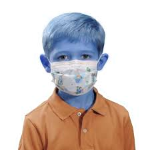

In [ ]:
img

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
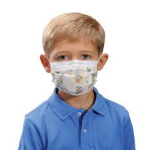

In [ ]:
img = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)
img

In [ ]:

img = img.reshape(1 , 150 , 150 , 3)
img.shape

(1, 150, 150, 3)

In [ ]:
if model.predict(img) > 0.5:
  print("  mask ")
else:
  print(" n0 Mask")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
 n0 Mask


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

img = image.load_img("/content/images.jpeg", target_size=(150,150))
img
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0   # normalize karna zaroori hai
prediction = model.predict(img_array)
print(prediction)
if prediction > 0.5:
  print("  mask ")
else:
  print(" n0 Mask")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[[4.695409e-05]]
 n0 Mask
